In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.simplefilter('ignore')

from auto_learning.models import CLASSIFICATION_MODELS, REGRESSION_MODELS
from auto_learning.hyp_param_search import HypParamSearch

data = load_wine()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

In [14]:
feature_selection = 'None'
crossval_type = 'kfold'
search_type = 'bayes_Gpyopt'
metrics = 'accuracy'
problem_type = 'classification'

est_list = []
for func in CLASSIFICATION_MODELS.values():
    est, params = func()
    hyp = HypParamSearch(x_train,
                         y_train,
                         x_test,
                         y_test,
                         est,
                         problem_type,
                         feature_selection,
                         params,
                         crossval_type,
                         search_type,
                         metrics)
    y_test_list, y_test_predicted_list, val_score, test_score, est = hyp.hyp_param_search()
    est_list.append(est)

    print(est)
    print(val_score, test_score)

    y_test_predicted_list = np.array(y_test_predicted_list, int)
    cm = confusion_matrix(y_test_list, y_test_predicted_list)
    cm_df = pd.DataFrame(cm, index=data.target_names, columns=data.target_names)
    plt.figure()
    sns.heatmap(cm_df, annot=True)
    plt.show()

LogisticRegression(C=8)
0.9838709677419355 0.9629629629629629


NameError: name 'sns' is not defined

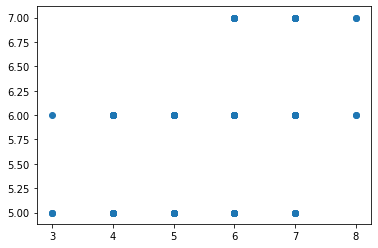

0.6058981233243967 0.6333333333333333


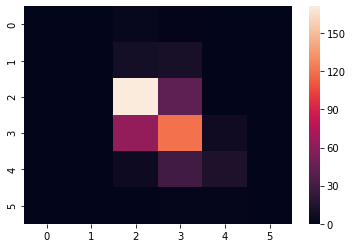

In [4]:
from estimator import StackedGeneralization

def sg(est_list):
    params = {}
    StackedGeneralization.est_list = est_list
    return StackedGeneralization, params

feature_selection = 'None'
crossval_type = 'kfold'
search_type = 'brute'
metrics = 'accuracy'
problem_type = 'classification'

est, params = sg(est_list)
hyp = HypParamSearch(x_train,
                     y_train,
                     x_test,
                     y_test,
                     est,
                     problem_type,
                     feature_selection,
                     params,
                     crossval_type,
                     search_type,
                     metrics)
y_test_list, y_test_predicted_list, val_score, test_score, est = hyp.hyp_param_search()

print(est)

plt.figure()
plt.scatter(y_test_list, y_test_predicted_list)
plt.show()

print(val_score, test_score)

y_test_predicted_list = np.array(y_test_predicted_list, int)
cm = confusion_matrix(y_test_list, y_test_predicted_list)

sns.heatmap(cm)
plt.show()

In [ ]:
from estimator import NeuralNet

def nn():
    params = {'bn1':[0.1,0.9], 'do1':[0.1,0.5], 'bn2':[0.1,0.9], 'do2':[0.1,0.5], 'bn3':[0.1,0.9], 'do3':[0.1,0.5]}
    return NeuralNet, params

feature_selection = 'None'
crossval_type = 'kfold'
search_type = 'bayes'
metrics = 'accuracy'
problem_type = 'classification'

est, params = nn()
hyp = HypParamSearch(x_train,
                     y_train,
                     x_test,
                     y_test,
                     est,
                     problem_type,
                     feature_selection,
                     params,
                     crossval_type,
                     search_type,
                     metrics)
y_test_list, y_test_predicted_list, val_score, test_score, est = hyp.hyp_param_search()

print(est)

plt.figure()
plt.scatter(y_test_list, y_test_predicted_list)
plt.show()

print(val_score, test_score)

y_test_predicted_list = np.array(y_test_predicted_list, int)
cm = confusion_matrix(y_test_list, y_test_predicted_list)

sns.heatmap(cm)
plt.show()

|   iter    |  target   |    bn1    |    bn2    |    bn3    |    do1    |    do2    |    do3    |
-------------------------------------------------------------------------------------------------
|  1        |  0.5308   |  0.5391   |  0.6722   |  0.5822   |  0.318    |  0.2695   |  0.3584   |
|  2        |  0.5719   |  0.1      |  0.1      |  0.1      |  0.1      |  0.1      |  0.1      |
|  3        |  0.5326   |  0.1      |  0.1      |  0.1      |  0.5      |  0.5      |  0.1      |
|  4        |  0.5416   |  0.9      |  0.1      |  0.1      |  0.1      |  0.1      |  0.1      |
|  5        |  0.5398   |  0.1      |  0.1      |  0.9      |  0.1      |  0.1      |  0.1      |
|  6        |  0.5871   |  0.1      |  0.9      |  0.1      |  0.1      |  0.1      |  0.1      |
|  7        |  0.5416   |  0.264    |  0.7733   |  0.1056   |  0.1199   |  0.4004   |  0.4032   |
